In [2]:
!pip install torch

In [1]:
import torch
from torch.autograd import Variable
from torch import nn 
from torch import optim

In [38]:
# Создайте случайный FloatTensor размера 3x4x5
tensor = torch.FloatTensor(torch.rand(3,4,5))

In [39]:
# Выведите его форму (shape)
tensor.size()

torch.Size([3, 4, 5])

In [40]:
# Приведите его к форме 6 X 10
tensor = tensor.view(6,10)
tensor

tensor([[0.3814, 0.5191, 0.9181, 0.3312, 0.5767, 0.4381, 0.8117, 0.9652, 0.9546,
         0.6559],
        [0.3887, 0.6700, 0.1186, 0.7295, 0.9962, 0.7074, 0.6006, 0.4262, 0.0868,
         0.8623],
        [0.0958, 0.0831, 0.2047, 0.8418, 0.3804, 0.4521, 0.5120, 0.8677, 0.3540,
         0.9467],
        [0.0221, 0.1906, 0.5844, 0.0217, 0.6655, 0.0836, 0.8308, 0.7053, 0.8447,
         0.9559],
        [0.1824, 0.9476, 0.9918, 0.3257, 0.5760, 0.9610, 0.7269, 0.1508, 0.0216,
         0.6894],
        [0.1121, 0.7228, 0.5285, 0.1532, 0.2445, 0.8619, 0.4431, 0.3858, 0.5500,
         0.0882]])

In [45]:
# Умножьте его на вектор [1, 4, 2, 2, 1] поэлементно
# тут возможно два варианта поэлементного умножения: перебирать элементы множимого и умножать их
# на вектор или такой (результат будет, конечно, разным)
tensor = (tensor.view(-1, 5) * torch.FloatTensor([1, 4, 2, 2, 1])).view(6,10)
tensor

tensor([[0.3814, 2.0763, 1.8361, 0.6625, 0.5767, 0.4381, 3.2468, 1.9305, 1.9091,
         0.6559],
        [0.3887, 2.6798, 0.2372, 1.4591, 0.9962, 0.7074, 2.4025, 0.8524, 0.1736,
         0.8623],
        [0.0958, 0.3325, 0.4093, 1.6835, 0.3804, 0.4521, 2.0479, 1.7354, 0.7080,
         0.9467],
        [0.0221, 0.7625, 1.1687, 0.0435, 0.6655, 0.0836, 3.3233, 1.4105, 1.6894,
         0.9559],
        [0.1824, 3.7904, 1.9835, 0.6513, 0.5760, 0.9610, 2.9077, 0.3016, 0.0431,
         0.6894],
        [0.1121, 2.8911, 1.0570, 0.3063, 0.2445, 0.8619, 1.7723, 0.7716, 1.1000,
         0.0882]])

In [48]:
# Умножьте тензор матрично на себя, чтобы результат был размерности 6x6
torch.mm(tensor, tensor.transpose(0, 1))

tensor([[27.1345, 18.3414, 14.9829, 21.5519, 23.3236, 18.1096],
        [18.3414, 18.2823, 11.5188, 13.4184, 20.7475, 14.5247],
        [14.9829, 11.5188, 12.0736, 12.4527, 11.0009,  8.2339],
        [21.5519, 13.4184, 12.4527, 19.2010, 16.5246, 12.6111],
        [23.3236, 20.7475, 11.0009, 16.5246, 29.0372, 19.7385],
        [18.1096, 14.5247,  8.2339, 12.6111, 19.7385, 15.3390]])

In [69]:
# Посчитайте производную функции y = x**3 + z - 75t в точке (1, 0.5, 2)
x = torch.tensor(1.0, requires_grad = True)
z = torch.tensor(0.5, requires_grad = True)
t = torch.tensor(2.0, requires_grad = True)
y = x**3 + z - 75*t
y.backward()
print(f'{x.grad.item()=}\n{z.grad.item()=}\n{t.grad.item()=}')

x.grad.item()=3.0
z.grad.item()=1.0
t.grad.item()=-75.0


In [70]:
# Создайте единичный тензор размера 5x6
ones = torch.ones(5,6)
ones

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [75]:
# Переведите его в формат numpy
type(ones.numpy())

numpy.ndarray

In [206]:
# Давайте теперь пооптимизируем: возьмите функцию y = x**w1 - 2 * x**2 + 5
# Посчитайте 

In [14]:
def func(w, x):
    return x**w1 - 2*x**2 + 5

In [15]:
w1 = 2 # примем коэффициент w1 равным 2, оптимизатор должен будет прийти к этому значению

In [31]:
x = Variable(torch.square(torch.randn(5)), requires_grad=True)
x

tensor([0.7213, 0.9454, 3.0625, 0.1871, 1.1893], requires_grad=True)

In [32]:
y = Variable(torch.tensor([func(w1, xi) for xi in x]), requires_grad=False) 
y # полученные истинные значения

tensor([  4.6463,   4.1500, -10.1358,   5.0755,   3.3919])

In [33]:
w1 = torch.randn(1) # получаем случайный коэффициент
w1.requires_grad_()

tensor([0.2874], requires_grad=True)

In [34]:
# для примера вывод предсказаний со случайным коэффициентом, они конечно будут отличаться от истинных значений
func(w1, x)

tensor([  4.8699,   4.1966, -12.3789,   5.5477,   3.2224],
       grad_fn=<AddBackward0>)

In [35]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD([w1], lr=1)

In [36]:
y_pred = []
EPOHS = 50
for i in range(EPOHS):
    optimizer.zero_grad()
    pred = func(w1, x[0]) # если передавать весь тензор x, а не первый результат 
                          # появляется ошибка в  loss.backward():
                          # "element 0 of tensors does not require grad and does not have a grad_fn"
    loss = criterion(pred, y[0])
    print('loss: ', loss.item())

    loss.backward()
    optimizer.step()
    
    print(f'iteration {i}, {w1=}, y={func(w1, x[0])}')
    y_pred.append(func(w1, x[0]).detach().numpy())

loss:  0.050002679228782654
iteration 0, w1=tensor([0.4204], requires_grad=True), y=tensor([4.8312], grad_fn=<AddBackward0>)
loss:  0.034182824194431305
iteration 1, w1=tensor([0.5257], requires_grad=True), y=tensor([4.8017], grad_fn=<AddBackward0>)
loss:  0.024149097502231598
iteration 2, w1=tensor([0.6113], requires_grad=True), y=tensor([4.7785], grad_fn=<AddBackward0>)
loss:  0.017474256455898285
iteration 3, w1=tensor([0.6820], requires_grad=True), y=tensor([4.7598], grad_fn=<AddBackward0>)
loss:  0.01287664845585823
iteration 4, w1=tensor([0.7414], requires_grad=True), y=tensor([4.7444], grad_fn=<AddBackward0>)
loss:  0.00962504930794239
iteration 5, w1=tensor([0.7917], requires_grad=True), y=tensor([4.7316], grad_fn=<AddBackward0>)
loss:  0.007277304772287607
iteration 6, w1=tensor([0.8347], requires_grad=True), y=tensor([4.7209], grad_fn=<AddBackward0>)
loss:  0.0055538867600262165
iteration 7, w1=tensor([0.8718], requires_grad=True), y=tensor([4.7117], grad_fn=<AddBackward0>)
l

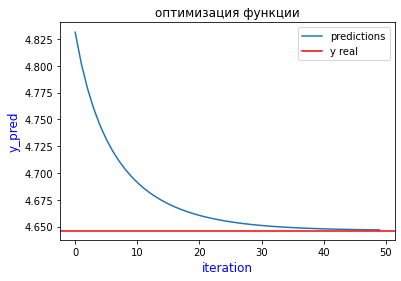

In [37]:
import matplotlib.pyplot as plt
plt.plot(y_pred, label='predictions')
plt.axhline(y=y[0], color='r', linestyle='-', label='y real')
plt.xlabel('iteration', fontsize=12, color='blue')
plt.ylabel('y_pred', fontsize=12, color='blue')
plt.title('оптимизация функции')
plt.legend()
